주식이란 어떤 회사가 있을 때 회사의 지분을 나눠놓은 조각을 뜻한다.
주식을 가지고 있다면 회사를 일부 소유하고 있다고 해도 무방하다.
1. 의결권
2. 배당금 받음
3. 청산시 잔여재산 받음
매도호가: 파는 것 중에 가장 싼 것(파랑) 
매수호가: 사는 것 중에 가장 비싼 것(빨강)

수요와 공급에 의해 
산다는 사람이 많으면 다 팔리면 점점 호가가 올라가고
판다는 사람이 많으면 계속 팔려서 호가가 떨어진다.
이러한 호가가 오르락 내리락하는 것을 보면 빨간 봉과 파란 봉으로 표현한다

빨간색 양봉과 파란색 음봉
양봉: 시가 보다 종가가 높을 때
음봉: 시가 보다 종가가 낮을 때

고가: 장중에 가장 높은 가격
종가: 장마감 시 가격(15:30)
시가: 장시작 시 가격(09:00) 
저가: 장중에 가장 낮은 가격

가장 쌀 떄 매수하고
가장 높을 때 매도하면 된다.

투자 전략을 어떻게 구현하느냐에 따라 수익률이 달라진다.<br><br>
`변동성 돌파 전략 - by 래리 윌리암스(Larry R. Williams)`
<pre>
전설적인 트레이더 래리 윌리엄스가 사용했던 전략 중 하나로
가격의 움직임이 일정 수준 이상을 뛰어넘는 강한 상승세를 돌파 신호로 파악하고
상승하는 추세를 따라가며, 짧은 수익을 실현하는 단기 트레이딩 전략이다.
</pre>

In [7]:
#!pip install -U finance-datareader
import FinanceDataReader as fdr
# 한국거래소에 상장된 모든 종목 리스트 가져오기
df_krx=fdr.StockListing('KRX') 
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7258 entries, 0 to 7257
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          7258 non-null   object        
 1   Market          7258 non-null   object        
 2   Name            7258 non-null   object        
 3   Sector          2439 non-null   object        
 4   Industry        2420 non-null   object        
 5   ListingDate     2439 non-null   datetime64[ns]
 6   SettleMonth     2439 non-null   object        
 7   Representative  2439 non-null   object        
 8   HomePage        2260 non-null   object        
 9   Region          2439 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 623.7+ KB


In [171]:
name=input('주식 코드 기업명:')
df_krx[df_krx['Name'].str.contains(name)]

주식 코드 기업명:우성


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
4399,006980,KOSPI,우성사료,"곡물가공품, 전분 및 전분제품 제조업","배합사료,Suit-feed(맞춤 TMR(육성우,건유우,착유우) 사료),농후사료,곡류...",1988-10-10,12월,한재규,http://www.woosungfeed.co.kr,대전광역시


In [39]:
df_krx[df_krx['Symbol'].str.contains(name[0])]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
72,016610,KOSPI,DB금융투자,금융 지원 서비스업,"유가증권,위탁매매,인수,자기매매",1988-06-27,12월,고원종,http://db-fi.com,서울특별시


In [82]:
name = ['016610', '37550K', '334690', '316300', '373490', '225050', '570053', '317240', '114190', '308100', '257990', '065170', '041140', '278650', '031390', '343090', '290120', '131220', '261200', '223250', '110990', '347700', '162120', '195500', '257370', '009580', '009200', '357250', '208890', '950190', '222160', '318410', '530069', '023000', '038500', '294630', '091090', '347000', '012600', '331920', '304100', '185190', '232830', '002800', '217320', '352700', '286000', '154030', '262840', '084850', '053800', '347860', '291650', '019990', '005850', '217910', '317830', '322190', '138360', '234070', '102210', '353060', '230980', '262260', '236810', '297890', '169330', '060850', '036560', '322310', '321820', '004720', '073560', '006980', '307280', '053080', '122830', '071460', '330350', '348350', '036090', '340360', '340930', '214320', '264850', '164060', '086890', '278990', '232530', '350520', '099750', '071200', '361390', '271980', '034940', '013890', '303030', '002780', '085660', '293490', '327970', '025880', '144620', '282880', '284740', '037030', '318020', '354230', '950210', '303360', '347740', '347770', '293480', '106190', '000087', '368770', '107640', '220180', '069260']

In [83]:
df_krx[df_krx['Symbol'] == name[0]]['Name'].item()

'DB금융투자'

In [173]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from tqdm import trange
import FinanceDataReader as fdr
import warnings
warnings.filterwarnings(action='ignore')

df_krx=fdr.StockListing('KRX') 
data = []

for i in range(len(name)):
    try:
        DATA = fdr.DataReader(name[i],'2018-01-01')['Close']
        ADF = adfuller(DATA)[1]
        KPSS = kpss(DATA)[1]
        KPSS_C = kpss(DATA,regression='c')[1] # constant trend
        KPSS_CT = kpss(DATA, regression='ct')[1]
        if ADF <= 0.05 and KPSS_C >= 0.05 and KPSS_CT >= 0.05:
            data.append(df_krx['Symbol'][i])
            print(i,df_krx[df_krx['Symbol'] == name[i]]['Name'].item())
            print(fdr.DataReader(name[i]).index[0])
            print(ADF)
            print(KPSS_C)
            print(KPSS_CT)
            #df_krx.iloc[0,0:3]
            #df_krx[['Symbol','Market','Name','ListingDate']][i:i+1]
    except:
        continue

In [122]:
fdr.DataReader(name[104],'2018-04-05')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-04-05,36100,40000,36100,39500,25930,0.091160
2018-04-06,39200,39600,38700,39000,9140,-0.012658
2018-04-09,38500,40100,38300,39400,7738,0.010256
2018-04-10,39400,42200,38300,42000,12799,0.065990
2018-04-11,42000,42200,41100,41300,8244,-0.016667
...,...,...,...,...,...,...
2021-03-30,42700,43150,42200,42550,36110,-0.004678
2021-03-31,42550,42950,41750,42800,72705,0.005875
2021-04-01,43000,43100,41550,42100,68927,-0.016355


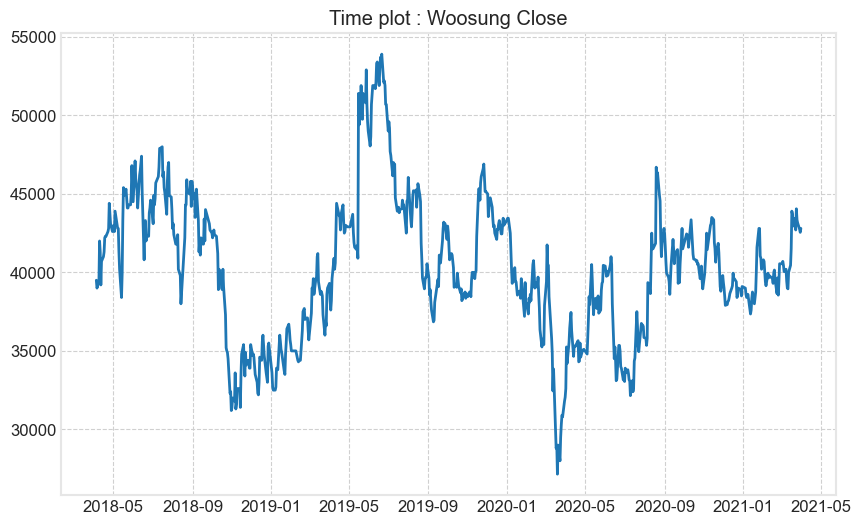

In [125]:
SE = fdr.DataReader(name[104],'2018-04-05','2021-03-31')
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

plt.title('Time plot : Woosung Close')
plt.plot(SE['Close'])
plt.show()

In [ ]:
# 이동평균선과 RSI를 이용한 알고리즘 투자 전략
# 볼린저 밴드를 활용한 알고리즘 투자 전략
# OBV 거래량 지표를 이용한 알고리즘 투자 전략
# 자금 흐름 지표를 이용한 알고리즘 투자 전략
# 스토캐스틱 지표를 이용한 알고리즘 투자 전략
# 실제 강도 지수를 이용한 알고리즘 트레이딩

In [79]:
# 스토캐스틱 지표
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Bollinger Bands
볼린저 밴드는 어떠한 시리즈(연속된 값 리스트)의 이동편균값에 표준편차를 빼고 더한 범위를 의미한다.

In [103]:
SE

,Open,High,Low,Close,Volume,Change,Moving Average,Standard Deviation,Upper BollingerBand,Lower BollingerBand
Date,,,,,,,,,,
2018-04-05,3130,3145,3065,3080,186556,-0.015974,3080.00,NaN,NaN,NaN
2018-04-06,3080,3125,3070,3080,117672,0.000000,3080.00,0.000000,3080.000000,3080.000000
2018-04-09,3095,3105,3050,3080,85435,0.000000,3080.00,0.000000,3080.000000,3080.000000
2018-04-10,3055,3095,3040,3070,71365,-0.003247,3077.50,5.000000,3087.500000,3067.500000
2018-04-11,3090,3090,3045,3050,82471,-0.006515,3072.00,13.038405,3098.076810,3045.923190
...,...,...,...,...,...,...,...,...,...,...
2021-03-30,4115,4135,4005,4035,1791314,-0.019441,3855.25,514.951390,4885.152780,2825.347220
2021-03-31,4040,4165,4010,4085,3084189,0.012392,3895.25,499.153164,4893.556329,2896.943671
2021-04-01,0,0,0,4085,0,0.000000,3936.50,477.513020,4891.526040,2981.473960


<AxesSubplot:xlabel='Date'>

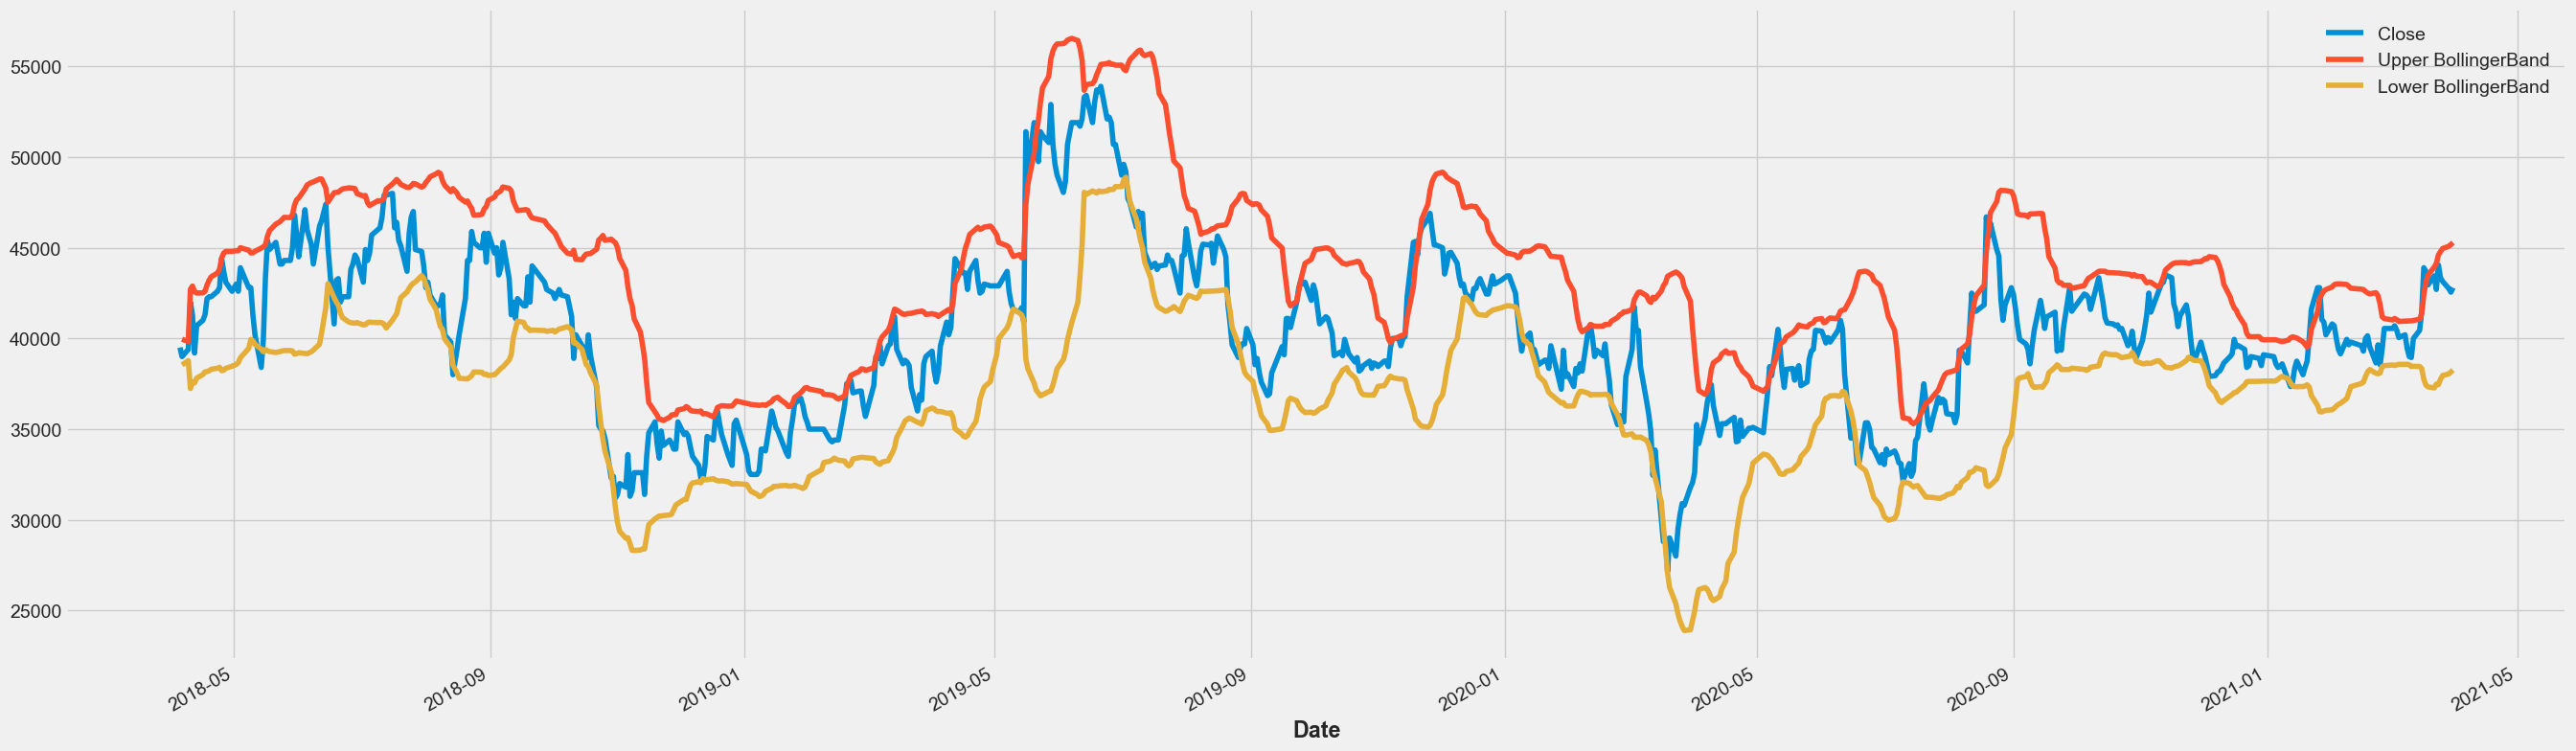

In [169]:
import pandas as pd
import matplotlib.pyplot as plt

# 
df = SE
w_size = 20
k = 2
df['Moving Average']      = df['Close'].rolling(window=w_size, min_periods=1).mean()
df['Standard Deviation']  = df['Close'].rolling(window=w_size, min_periods=1).std()
df['Upper BollingerBand'] = df['Moving Average'] + (df['Standard Deviation'] * k)
df['Lower BollingerBand'] = df['Moving Average'] - (df['Standard Deviation'] * k)
df[['Close', 'Upper BollingerBand', 'Lower BollingerBand']].plot(figsize=(30,10))

In [96]:
!pip install mplfinance

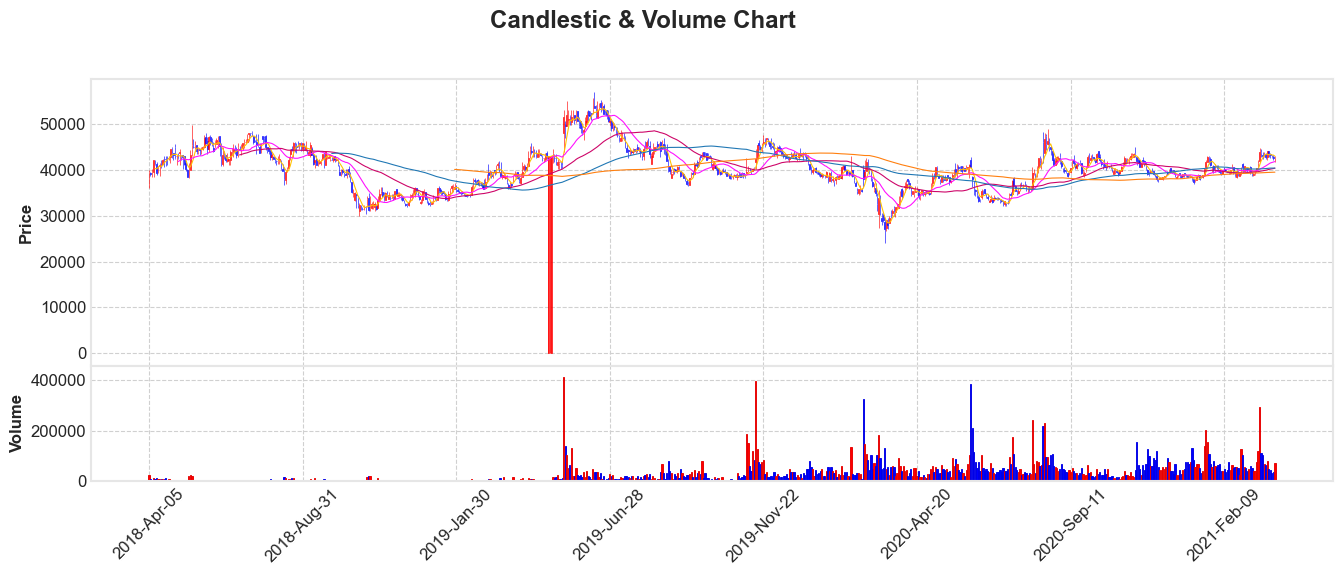

In [170]:
import mplfinance as mpf
#iday = df.loc['2021-01-01':'2021-03-16',:]
iday = SE

mc=mpf.make_marketcolors(up='r',down='b',inherit=True)
k=mpf.make_mpf_style(base_mpf_style='binance',marketcolors=mc)

mpf.plot(iday,
         type='candle',
         volume=True,
         title='Candlestic & Volume Chart',
         style=k,
         figratio=(3,1),
         mav=(5,20,60,120,200))

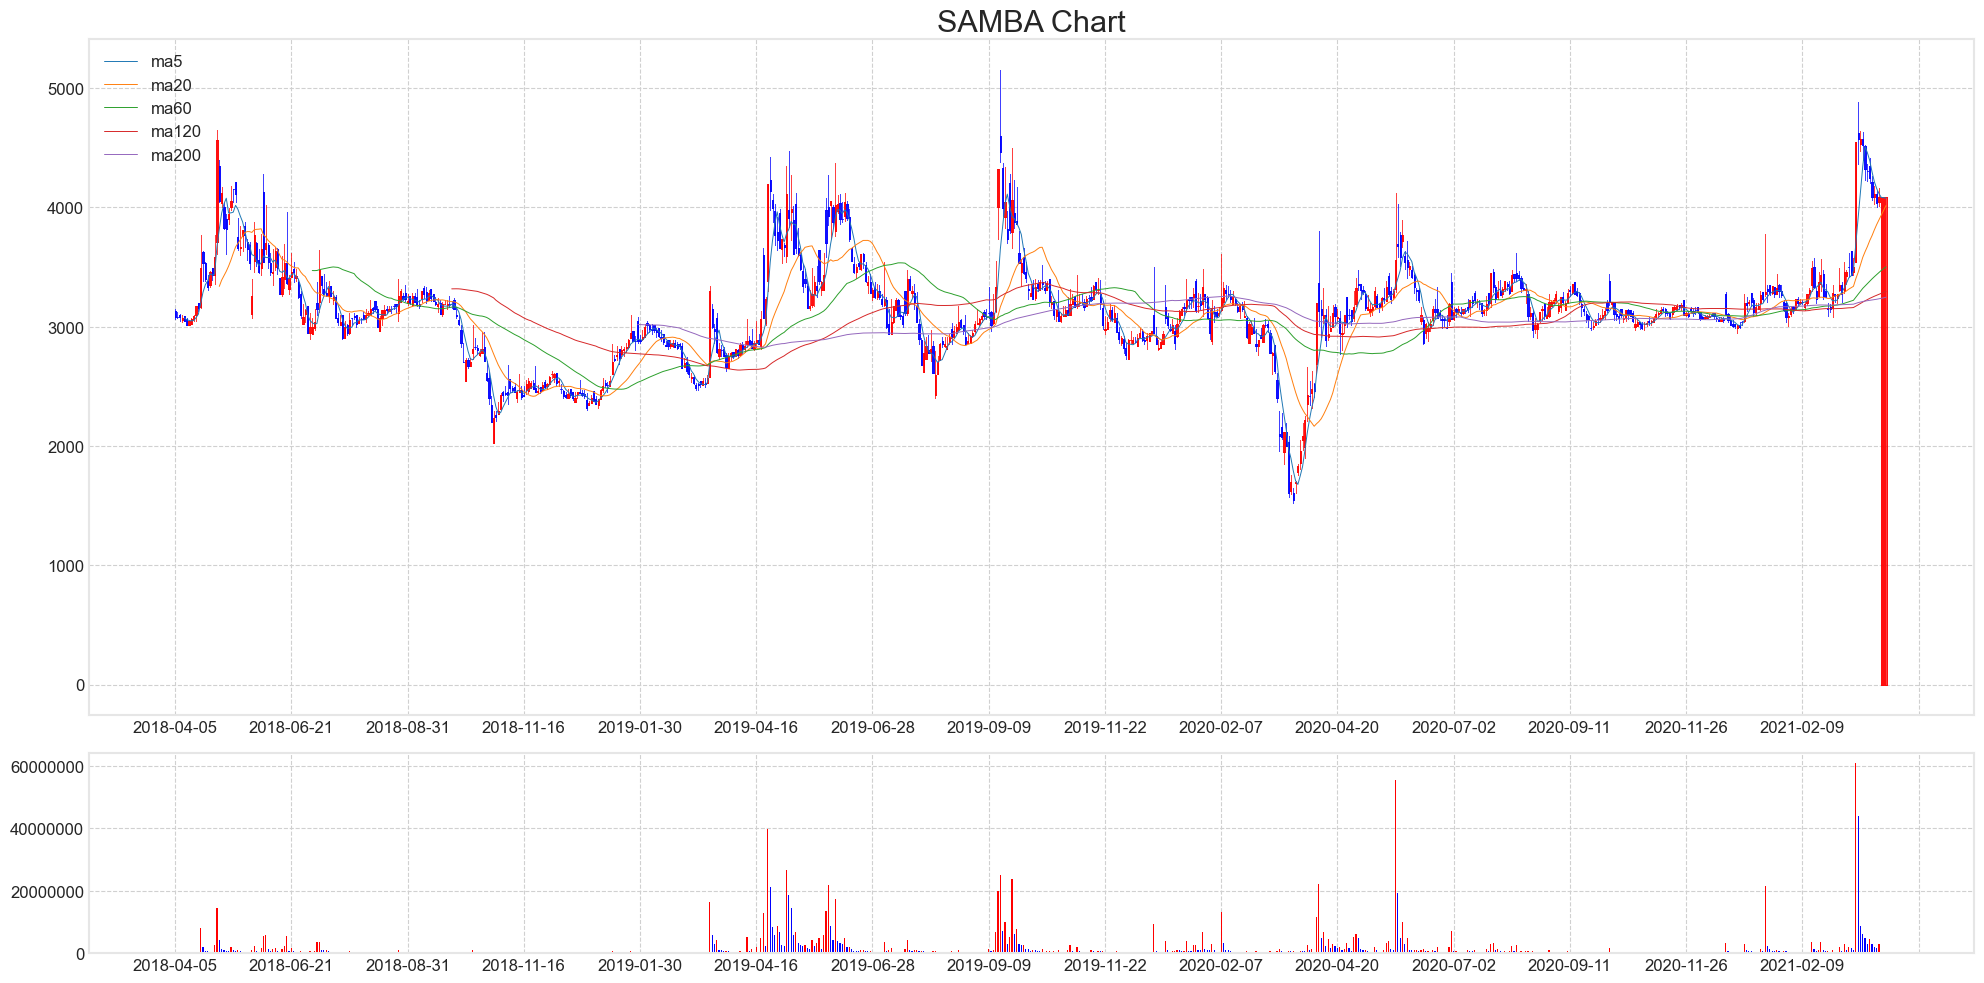

In [101]:
from mpl_finance import candlestick2_ohlc
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd
#from pandas_datareader import data  
from datetime import datetime
from IPython.display import display

df = SE['Close']
ma5 = df.rolling(window=5).mean()
ma20 = df.rolling(window=20).mean()
ma60 = df.rolling(window=60).mean()
ma120 = df.rolling(window=120).mean()
ma200 = df.rolling(window=200).mean()

# 그래프 구역 나누기
fig = plt.figure(figsize=(20,10))
top_axes = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4, sharex=top_axes)
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)

# 인덱스 설정
idx = SE.index.astype('str')

# 이동평균선 그리기
top_axes.plot(idx, ma5, label='ma5', linewidth=0.7)
top_axes.plot(idx, ma20, label='ma20', linewidth=0.7)
top_axes.plot(idx, ma60, label='ma60', linewidth=0.7)
top_axes.plot(idx, ma120, label='ma120', linewidth=0.7)
top_axes.plot(idx, ma200, label='ma200', linewidth=0.7)

# 캔들차트 그리기
candlestick2_ohlc(top_axes, SE['Open'], SE['High'], 
                  SE['Low'], SE['Close'],
                  width=0.5, colorup='r', colordown='b')

# 거래량 날짜 지정
color_fuc = lambda x : 'r' if x >= 0 else 'b'
color_list = list(SE['Volume'].diff().fillna(0).apply(color_fuc))
bottom_axes.bar(idx, SE['Volume'], width=0.5, 
                align='center',
                color=color_list)

# 그래프 title 지정
#top_axes.set_title('SAMBA Chart', fontsize=22)
# X축 티커 숫자 제한
top_axes.xaxis.set_major_locator(ticker.MaxNLocator(20))

top_axes.legend()
plt.tight_layout()
plt.show()

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

df = SE
df.index

DatetimeIndex(['2018-04-05', '2018-04-06', '2018-04-09', '2018-04-10',
               '2018-04-11', '2018-04-12', '2018-04-13', '2018-04-16',
               '2018-04-17', '2018-04-18',
               ...
               '2021-03-18', '2021-03-19', '2021-03-22', '2021-03-23',
               '2021-03-24', '2021-03-25', '2021-03-26', '2021-03-29',
               '2021-03-30', '2021-03-31'],
              dtype='datetime64[ns]', name='Date', length=734, freq=None)

In [128]:
def SMA(data, period=30, column='Close'):
    return data[column].rolling(window=period).mean()

def EMA(data, period=20, column='Close'):
    return data[column].ewm(span=period, adjust=False).mean()

In [141]:
df['SMA'] = SMA(df, period=30)
df['EMA'] = EMA(df, period=20)

<AxesSubplot:xlabel='Date'>

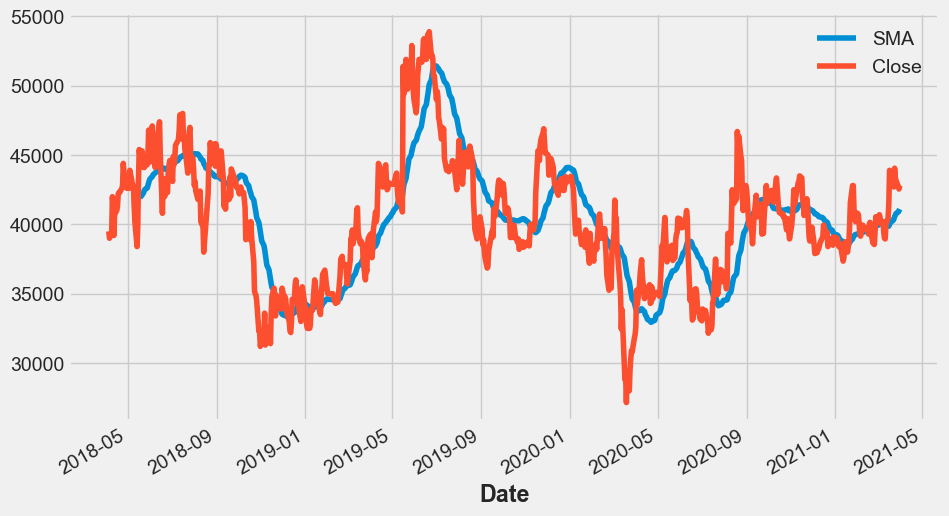

In [144]:
df[['SMA','Close']].plot(figsize=(10,6))

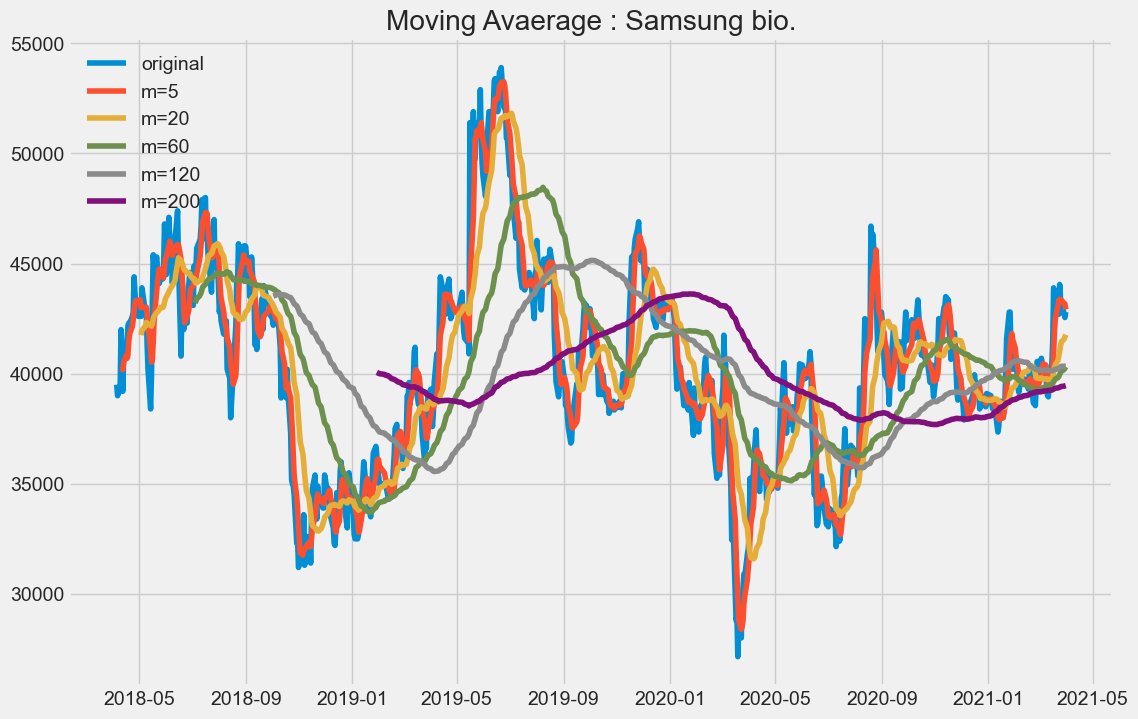

In [145]:
df = SE['Close']
ma5 = df.rolling(window=5).mean()
ma20 = df.rolling(window=20).mean()
ma60 = df.rolling(window=60).mean()
ma120 = df.rolling(window=120).mean()
ma200 = df.rolling(window=200).mean()

import matplotlib.pyplot as plt
plt.figure(figsize=[12,8])
plt.title('Moving Avaerage : Samsung bio.')
plt.plot(df,label='original')
plt.plot(ma5,label='m=5')
plt.plot(ma20,label='m=20')
plt.plot(ma60,label='m=60')
plt.plot(ma120,label='m=120')
plt.plot(ma200,label='m=200')
plt.legend(loc=2)
plt.show()

In [157]:
import pandas as pd
df = SE['Close']
df_ma_s=df.rolling(window=50).mean()
df_ma_L=df.rolling(window=200).mean()
df_all=pd.concat([df_ma_s, df_ma_L], axis=1)
df_all.columns=['ma50','ma200']
df_all['ma50_diff']=df_all['ma50'].diff()
df_all['ma200_diff']=df_all['ma200'].diff()
df_all.dropna(inplace=True)

In [166]:
ma_ls = [5,20,60,120,200]
for i in range(len(ma_ls)):
    a = df['Close'].rolling(window=ma_ls[i]).mean()
    df['MA'+str(ma_ls[i])] = a

In [168]:
df['Close']

Date
2018-04-05    39500
2018-04-06    39000
2018-04-09    39400
2018-04-10    42000
2018-04-11    41300
              ...  
2021-03-25    43350
2021-03-26    43150
2021-03-29    42750
2021-03-30    42550
2021-03-31    42800
Name: Close, Length: 734, dtype: int64